<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-01-08 11:07:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-01-08 11:07:18 (11.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.1+ KB


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  44.64 MB/s


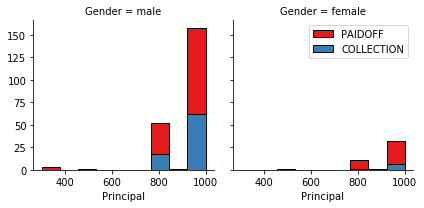

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

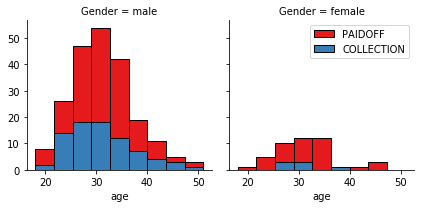

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

In [12]:
df['effective_date'].dt.dayofweek.head()

0    3
1    3
2    3
3    4
4    4
Name: effective_date, dtype: int64

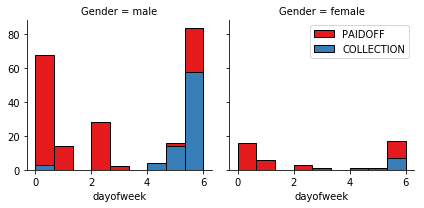

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['dayofweek'].value_counts()

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [15]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [16]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


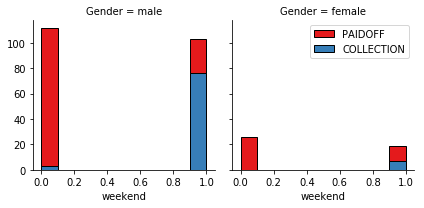

In [17]:
bins = np.linspace(df.weekend.min(), df.weekend.max(),11)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'weekend', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Convert Categorical features to numerical values

Lets look at gender:

In [18]:
df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [21]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              0               33
                      1               11
High School or Below  0              112
                      1               39
Master or Above       0                1
                      1                1
college               0              114
                      1               35
Name: loan_status, dtype: int64

In [22]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [23]:
dd= df[['Principal','terms','age','Gender','education']].head()
dd

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [24]:
df['Principal'].unique()

array([1000,  800,  300,  900,  500])

In [25]:
df['terms'].unique() 

array([30, 15,  7])

In [26]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [27]:
len(df)

346

In [28]:
import seaborn as sns

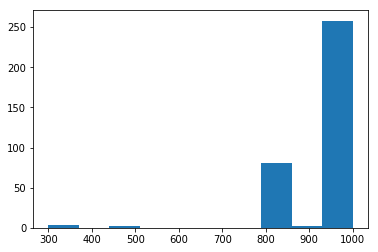

In [29]:
plt.hist(x='Principal',data=df)
plt.show()

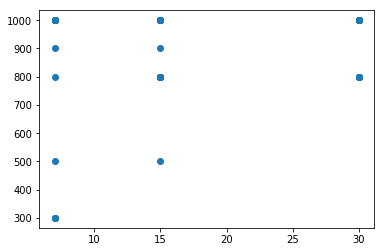

In [30]:
plt.scatter(df['terms'],df['Principal'])
plt.show()

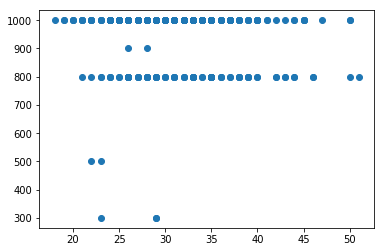

In [31]:
plt.scatter(df['age'],df['Principal'])
plt.show()

In [32]:
import seaborn as sns

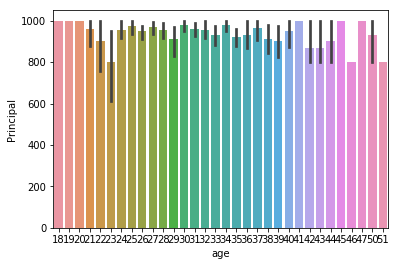

In [33]:
sns.barplot(df['age'],df['Principal'])

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [34]:
F = df[['Principal','terms','age','Gender','weekend']]
F = pd.concat([F,pd.get_dummies(df['education'])], axis=1)
F.drop(['Master or Above'], axis = 1,inplace=True)
F.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [35]:
F = pd.concat([F,pd.get_dummies(df['terms'])], axis=1)
F.drop([7], axis = 1,inplace=True)
F.drop(['terms'], axis = 1,inplace=True)
F.head()

,Principal,age,Gender,weekend,Bechalor,High School or Below,college,15,30
0,1000,45,0,0,0,1,0,0,1
1,1000,33,1,0,1,0,0,0,1
2,1000,27,0,0,0,0,1,1,0
3,1000,28,1,1,0,0,1,0,1
4,1000,29,0,1,0,0,1,0,1


In [36]:
F = pd.concat([F,pd.get_dummies(df['Principal'])], axis=1)
F.drop([500], axis = 1,inplace=True)
F.drop([900], axis = 1,inplace=True)
F.drop(['Principal'], axis = 1,inplace=True)
F.head()

,age,Gender,weekend,Bechalor,High School or Below,college,15,30,300,800,1000
0,45,0,0,0,1,0,0,1,0,0,1
1,33,1,0,1,0,0,0,1,0,0,1
2,27,0,0,0,0,1,1,0,0,0,1
3,28,1,1,0,0,1,0,1,0,0,1
4,29,0,1,0,0,1,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [37]:
X = F
X[0:5]

,age,Gender,weekend,Bechalor,High School or Below,college,15,30,300,800,1000
0,45,0,0,0,1,0,0,1,0,0,1
1,33,1,0,1,0,0,0,1,0,0,1
2,27,0,0,0,0,1,1,0,0,0,1
3,28,1,1,0,0,1,0,1,0,0,1
4,29,0,1,0,0,1,0,1,0,0,1


What are our lables?

In [38]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [39]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Importing the Classifiers

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix

## Train Test split

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.33,random_state=101)

In [42]:
from sklearn.preprocessing import StandardScaler

Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_valid = Sc_X.fit_transform(X_valid)

In [43]:
X_train[:5]

array([[-0.84724191, -0.40100377,  0.7701321 , -0.42257713,  1.22917434,
        -0.88921183, -0.85839508,  0.91287093, -0.09345386, -0.51887452,
         0.54566731],
       [ 0.19286198, -0.40100377,  0.7701321 , -0.42257713,  1.22917434,
        -0.88921183,  1.16496475, -1.09544512, -0.09345386, -0.51887452,
         0.54566731],
       [ 2.44642041, -0.40100377,  0.7701321 , -0.42257713,  1.22917434,
        -0.88921183,  1.16496475, -1.09544512, -0.09345386, -0.51887452,
         0.54566731],
       [ 1.57966716, -0.40100377,  0.7701321 , -0.42257713,  1.22917434,
        -0.88921183,  1.16496475, -1.09544512, -0.09345386, -0.51887452,
         0.54566731],
       [-0.84724191, -0.40100377,  0.7701321 , -0.42257713, -0.81355424,
         1.12459143, -0.85839508,  0.91287093, -0.09345386, -0.51887452,
         0.54566731]])

In [44]:
y_train.shape

(231,)

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [45]:
knn_train = KNeighborsClassifier(n_neighbors=1)
knn_train.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
knn_predictions_train = knn_train.predict(X_valid)
knn_predictions_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [47]:
y_valid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [48]:
print(classification_report(y_valid,knn_predictions_train))
print(confusion_matrix(y_valid,knn_predictions_train))

             precision    recall  f1-score   support

          0       0.79      0.76      0.77        88
          1       0.30      0.33      0.32        27

avg / total       0.67      0.66      0.67       115

[[67 21]
 [18  9]]


## To Find the value of K for least Error Rate

In [49]:
error_rate = []
for i in range(1,50):
    
    knn_train = KNeighborsClassifier(n_neighbors=i)
    knn_train.fit(X_train,y_train)
    knn_predictions_train_i = knn_train.predict(X_valid)
    error_rate.append(np.mean(knn_predictions_train_i != y_valid))

Text(0,0.5,'Error Rate')

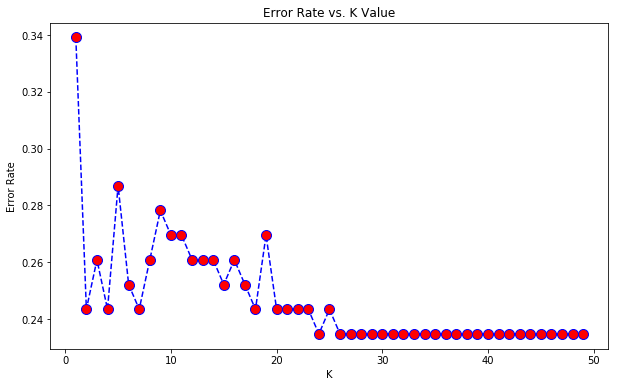

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

For K=24 the Error rate is minimum

In [51]:
knn_trainn = KNeighborsClassifier(n_neighbors=24)
knn_trainn.fit(X_train,y_train)
knn_predictions_trainn = knn_trainn.predict(X_valid)
print(classification_report(y_valid,knn_predictions_trainn))
print(confusion_matrix(y_valid,knn_predictions_trainn))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87        88
          1       0.00      0.00      0.00        27

avg / total       0.59      0.77      0.66       115

[[88  0]
 [27  0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
acc_knn = accuracy_score(y_valid, knn_predictions_train)
acc_knn

0.66086956521739126

# Decision Tree

In [53]:
dtree_train = DecisionTreeClassifier()
dtree_train.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
dtree_predictions_train = dtree_train.predict(X_valid)
dtree_predictions_train[:5]

array([0, 0, 0, 0, 0])

In [55]:
print(classification_report(y_valid,dtree_predictions_train))
print(confusion_matrix(y_valid,dtree_predictions_train))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81        88
          1       0.30      0.22      0.26        27

avg / total       0.67      0.70      0.68       115

[[74 14]
 [21  6]]


In [56]:
acc_dtree = accuracy_score(y_valid, dtree_predictions_train)
acc_dtree

0.69565217391304346

# Support Vector Machine

In [57]:
svm_train = SVC()
svm_train.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
svm_predictions_train = svm_train.predict(X_valid)

In [59]:
print(classification_report(y_valid,svm_predictions_train))
print(confusion_matrix(y_valid,svm_predictions_train))

             precision    recall  f1-score   support

          0       0.76      0.99      0.86        88
          1       0.00      0.00      0.00        27

avg / total       0.58      0.76      0.66       115

[[87  1]
 [27  0]]


In [60]:
acc_svm = accuracy_score(y_valid, svm_predictions_train)
acc_svm

0.75652173913043474

# Logistic Regression

In [61]:
lomo_train = LogisticRegression()
lomo_train.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
lomo_predictions_train = lomo_train.predict(X_valid)
lomo_predictions_train[:6]

array([0, 0, 0, 0, 0, 0])

In [63]:
print(classification_report(y_valid,lomo_predictions_train))
print(confusion_matrix(y_valid,lomo_predictions_train))

             precision    recall  f1-score   support

          0       0.81      0.89      0.85        88
          1       0.47      0.33      0.39        27

avg / total       0.73      0.76      0.74       115

[[78 10]
 [18  9]]


In [64]:
acc_lomo = accuracy_score(y_valid, lomo_predictions_train)
acc_lomo

0.75652173913043474

# Model Evaluation using Test set

In [65]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [66]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-01-08 11:08:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-01-08 11:08:21 (477 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [67]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [68]:
test_df.shape

(54, 10)

In [69]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [70]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['dayofweek'].value_counts()

6    24
0    14
5     8
1     3
4     2
2     2
3     1
Name: dayofweek, dtype: int64

### EDA 

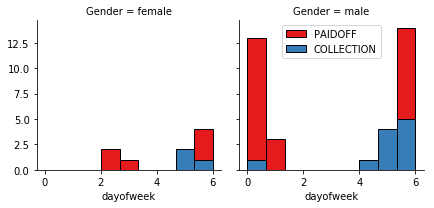

In [71]:
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [72]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [73]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [74]:
test_df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              0               8
High School or Below  0              11
                      1              10
Master or Above       0               2
college               0              19
                      1               4
Name: loan_status, dtype: int64

In [75]:
test_df['Principal'].value_counts()

1000    39
800     11
300      3
700      1
Name: Principal, dtype: int64

In [76]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

### One Hot Encoding and Feature selection 

In [77]:
Fa = test_df[['Principal','terms','age','Gender','weekend']]
Fa = pd.concat([Fa,pd.get_dummies(test_df['education'])], axis=1)
Fa.drop(['Master or Above'], axis = 1,inplace=True)
Fa = pd.concat([Fa,pd.get_dummies(test_df['terms'])], axis=1)
Fa.drop([7], axis = 1,inplace=True)
Fa.drop(['terms'], axis = 1,inplace=True)
Fa = pd.concat([Fa,pd.get_dummies(test_df['Principal'])], axis=1)
Fa.drop([700], axis = 1,inplace=True)
Fa.drop(['Principal'], axis = 1,inplace=True)
Fa.head()

,age,Gender,weekend,Bechalor,High School or Below,college,15,30,300,800,1000
0,50,1,0,1,0,0,0,1,0,0,1
1,35,0,1,0,0,0,0,0,1,0,0
2,43,1,1,0,1,0,0,1,0,0,1
3,26,0,1,0,0,1,0,1,0,0,1
4,29,0,1,1,0,0,1,0,0,1,0


In [78]:
Fa.shape

(54, 11)

In [79]:
F.shape

(346, 11)

In [80]:
F.head()

,age,Gender,weekend,Bechalor,High School or Below,college,15,30,300,800,1000
0,45,0,0,0,1,0,0,1,0,0,1
1,33,1,0,1,0,0,0,1,0,0,1
2,27,0,0,0,0,1,1,0,0,0,1
3,28,1,1,0,0,1,0,1,0,0,1
4,29,0,1,0,0,1,0,1,0,0,1


In [81]:
X_test = Fa
y_test = test_df['loan_status'].values

In [82]:
X_test.head()

,age,Gender,weekend,Bechalor,High School or Below,college,15,30,300,800,1000
0,50,1,0,1,0,0,0,1,0,0,1
1,35,0,1,0,0,0,0,0,1,0,0
2,43,1,1,0,1,0,0,1,0,0,1
3,26,0,1,0,0,1,0,1,0,0,1
4,29,0,1,1,0,0,1,0,0,1,0


In [83]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# KNN 

### We use the K = 24 where the Error rate is low

In [84]:
knn_trainn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [85]:
knn_predictions = knn_trainn.predict(X_test)
knn_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
print(classification_report(y_test,knn_predictions))
print(confusion_matrix(y_test,knn_predictions))

             precision    recall  f1-score   support

          0       0.74      1.00      0.85        40
          1       0.00      0.00      0.00        14

avg / total       0.55      0.74      0.63        54

[[40  0]
 [14  0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
jaccard_knn = jaccard_similarity_score(y_test, knn_predictions)
jaccard_knn=float("{:.2f}".format(jaccard_knn))
jaccard_knn

0.74

In [88]:
f1_score_knn = f1_score(y_test, knn_predictions,average='weighted')
f1_score_knn=float("{:.2f}".format(f1_score_knn))
f1_score_knn

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63

# Decision Tree

In [89]:
dtree_predictions = dtree_train.predict(X_test)

In [90]:
print(classification_report(y_test,dtree_predictions))
print(confusion_matrix(y_test,dtree_predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        40
          1       0.26      1.00      0.41        14

avg / total       0.07      0.26      0.11        54

[[ 0 40]
 [ 0 14]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
acc_dtree_test = accuracy_score(y_test, dtree_predictions)
acc_dtree_test

0.25925925925925924

In [92]:
jaccard_dtree = jaccard_similarity_score(y_test, dtree_predictions)
jaccard_dtree = float("{:.2f}".format(jaccard_dtree))
jaccard_dtree

0.26

In [93]:
f1_score_dtree = f1_score(y_test, dtree_predictions,average='weighted')
f1_score_dtree = float("{:.2f}".format(f1_score_dtree))
f1_score_dtree

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.11

# Support Vector Machine

In [94]:
svm_predictions = svm_train.predict(X_test)
print(classification_report(y_test,svm_predictions))
print(confusion_matrix(y_test,svm_predictions))

             precision    recall  f1-score   support

          0       0.74      1.00      0.85        40
          1       0.00      0.00      0.00        14

avg / total       0.55      0.74      0.63        54

[[40  0]
 [14  0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
acc_svm = accuracy_score(y_test, svm_predictions)
acc_svm

0.7407407407407407

In [96]:
jaccard_svm = jaccard_similarity_score(y_test, svm_predictions)
jaccard_svm = float("{:.2f}".format(jaccard_svm))
jaccard_svm

0.74

In [97]:
f1_score_svm = f1_score(y_test, svm_predictions,average='weighted')
f1_score_svm = float("{:.2f}".format(f1_score_svm))
f1_score_svm

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63

# Logistic Regression

In [98]:
#lomo = LogisticRegression()
#lomo.fit(X_trainn,y_trainn)
lomo_predictions = lomo_train.predict(X_test)
print(classification_report(y_test,lomo_predictions))
print(confusion_matrix(y_test,lomo_predictions))

             precision    recall  f1-score   support

          0       0.74      1.00      0.85        40
          1       0.00      0.00      0.00        14

avg / total       0.55      0.74      0.63        54

[[40  0]
 [14  0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
acc_lomo = accuracy_score(y_test, lomo_predictions)
acc_lomo

0.7407407407407407

In [100]:
jaccard_lomo = jaccard_similarity_score(y_test, lomo_predictions)
jaccard_lomo = float("{:.2f}".format(jaccard_lomo))
jaccard_lomo

0.74

In [101]:
f1_score_lomo = f1_score(y_test, lomo_predictions,average='weighted')
f1_score_lomo = float("{:.2f}".format(f1_score_lomo))
f1_score_lomo

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63

In [102]:
log_loss_lomo = log_loss(y_test, lomo_predictions)
log_loss_lomo = float("{:.2f}".format(log_loss_lomo)) 
log_loss_lomo

8.95

# MODEL PERFORMANCE

In [103]:
model_performance = pd.DataFrame({
    "Algorithm": ["K Nearest Neighbors","Decision Tree","SVM", 
              "Logistic Regression"],
    "F1-score": [f1_score_knn,f1_score_dtree,f1_score_svm,f1_score_lomo],
    "Jaccard": [jaccard_knn,jaccard_dtree,jaccard_svm,jaccard_lomo],
    "LogLoss" : ['NA','NA','NA',log_loss_lomo]
})
model_performance.set_index('Algorithm',inplace=True)
model_performance

,F1-score,Jaccard,LogLoss
Algorithm,,,
K Nearest Neighbors,0.63,0.74,NA
Decision Tree,0.11,0.26,NA
SVM,0.63,0.74,NA
Logistic Regression,0.63,0.74,8.95


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>